In [78]:
import pandas as pd

In [79]:
df = pd.read_csv(r"C:\Users\rsdha\OneDrive\Desktop\New folder\questions.csv")

# Initial EDA

In [80]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [81]:
df.shape

(404351, 6)

In [82]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
189504,189504,374149,374150,What plane will British Airways buy after thei...,What planes of the future will be larger than ...,0
120348,120348,72194,238498,When does a startup stop being a startup and b...,What is a startup? Does it have to be IT or co...,0
234515,234515,462038,462039,Why do I feel a light electricity shock when t...,What happens when we touch a live wire wearing...,0
132132,132132,261700,261701,What is cave diving? What makes cave diving so...,What makes cave diving so dangerous?,1
148541,148541,293878,293879,What career choice do I have after completing ...,What are the best option after completing my B...,1
206655,206655,407694,407695,What are the differences between car struts an...,Can a car alarm going off drain your battery?,0
129757,129757,257018,257019,How do you send a Snapchat video without sound?,Does using a third party camera app produce sn...,0
318818,318818,625539,233648,How much protein scoop should I take in a day ?,How much whey protein should you take a day ?,0
389504,389504,761405,761406,Can you explain gravity physics from Newton to...,What is Newton's Law of Gravitation?,0
137961,137961,273132,273133,Why isn't the film adapted entirely to the ori...,Why are movie adaptations so different than th...,0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [84]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [85]:
df.duplicated().sum()

np.int64(0)

## Distribution of data

is_duplicate
0    255045
1    149306
Name: count, dtype: int64
is_duplicate
0    63.07515
1    36.92485
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

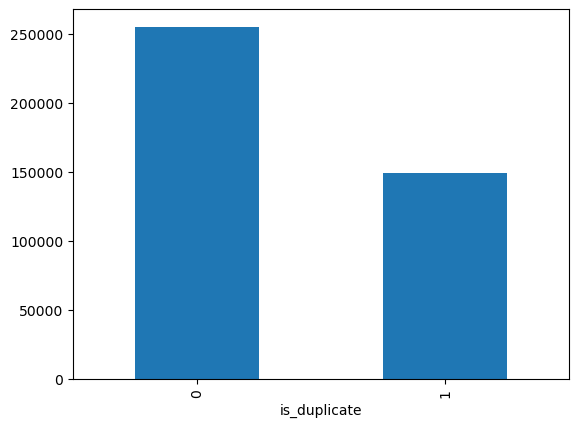

In [86]:
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [87]:
# Repeated Questions
import numpy as np
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 789801
Number of questions getting repeated 13698


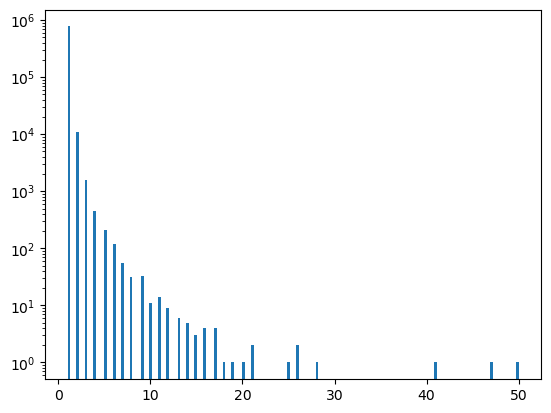

In [88]:
# Repeated questions histogram
import matplotlib.pyplot as plt
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

# Only BOW(sample testing)

In [89]:
new_df=df.sample(3000)

In [90]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [91]:
ques_df=new_df[['question1','question2']]
ques_df.head()

,question1,question2
38838,What are the problems you are facing due to de...,How much revenue will the government lose for ...
402433,Why hasn't N.W.A. been inducted into the Rock ...,Why has Rush not been inducted into the Rock a...
234911,Who creates the topics on Quora?,Who defines topics on Quora?
396951,Do you recognize Jesus Christ as your Lord and...,Do you believe Jesus Christ is the Son of God?
211453,What are the best ways to be a better web desi...,How can I be a good web designer?


In [92]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=300)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [93]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(3000, 600)

In [94]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
38838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
402433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
234911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
211453,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223834,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
328539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
193062,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [95]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [96]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,is_duplicate
38838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
402433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
234911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
396951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
211453,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.6816666666666666

In [99]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.685

# BOW with Basic Features

In [100]:

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [101]:
new_df = df.sample(3000,random_state=2)

In [102]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [103]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0


is_duplicate
0    1889
1    1111
Name: count, dtype: int64
is_duplicate
0    62.966667
1    37.033333
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

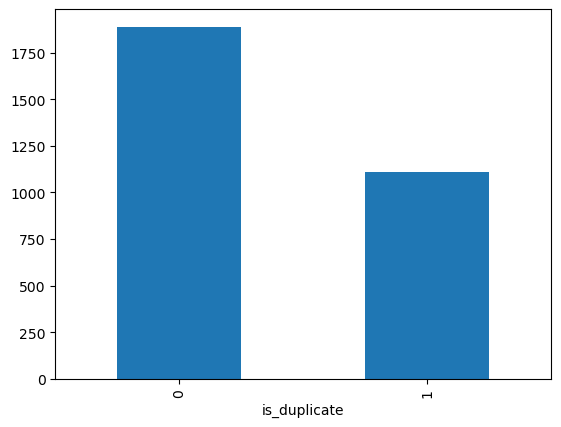

In [104]:
# Distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [105]:
# Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 5998
Number of questions getting repeated 2


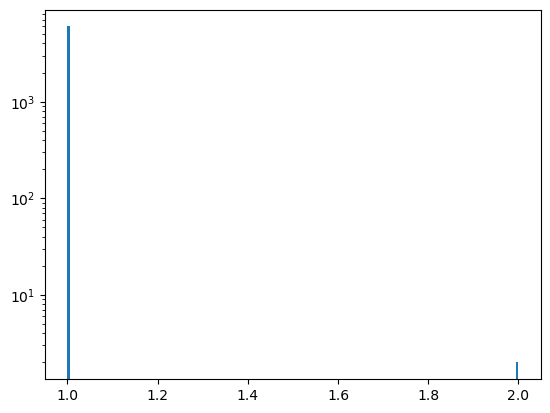

In [106]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [107]:
# Feature Engineering

new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [108]:

new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39


In [109]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8


In [110]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [111]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,4
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,2
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,20
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,5
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,3


In [112]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [113]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,4,19
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,2,32
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,20,42
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,5,18
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,3,19


In [114]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,4,19,0.21
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,2,32,0.06
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,20,42,0.48
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,5,18,0.28
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,3,19,0.16


minimum characters 12
maximum characters 281
average num of characters 60


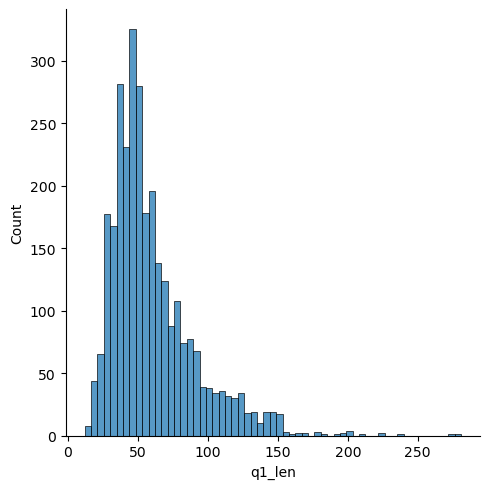

In [115]:
# Analysis of features
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 12
maximum characters 340
average num of characters 60


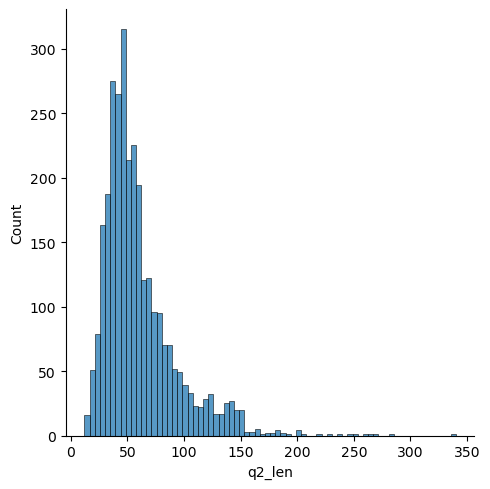

In [116]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 2
maximum words 50
average num of words 11


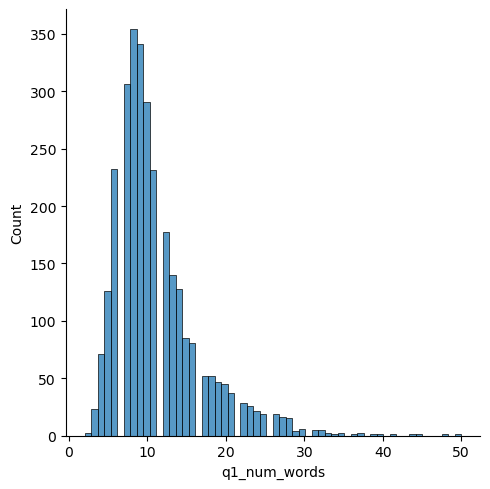

In [117]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))


minimum words 1
maximum words 68
average num of words 11


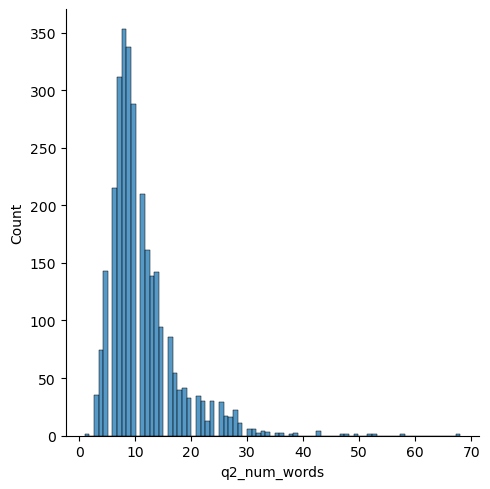

In [118]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

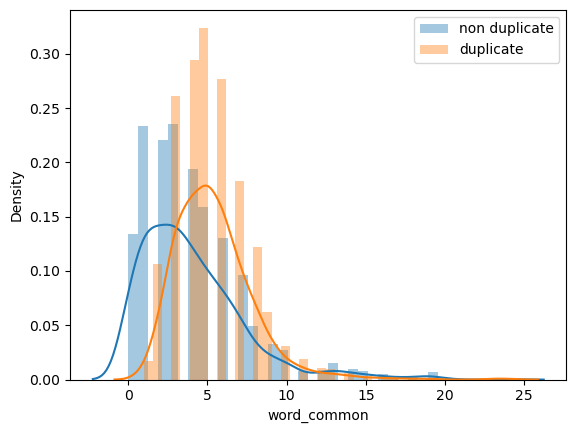

In [119]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

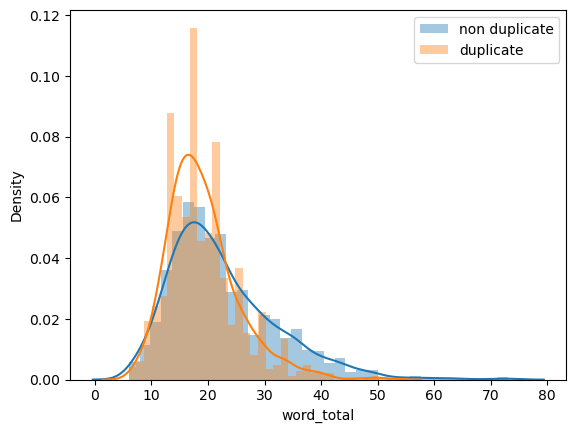

In [120]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

In [121]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
339499,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?
289521,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...
4665,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...
54203,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...
132566,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?


In [122]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(3000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
339499,1,58,42,11,8,4,19,0.21
289521,0,52,105,11,22,2,32,0.06
4665,0,125,124,24,24,20,42,0.48
54203,1,45,60,8,10,5,18,0.28
132566,0,54,39,11,8,3,19,0.16


In [123]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [124]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(3000, 6000)

In [125]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(3000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
339499,1,58,42,11,8,4,19,0.21,0,0,...,0,0,0,0,0,0,0,0,0,0
289521,0,52,105,11,22,2,32,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
4665,0,125,124,24,24,20,42,0.48,0,0,...,0,0,0,0,0,0,0,0,0,0
54203,1,45,60,8,10,5,18,0.28,0,0,...,0,0,0,0,0,0,0,0,0,0
132566,0,54,39,11,8,3,19,0.16,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7316666666666667

In [128]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.6916666666666667

# BOW-with-preprocessing-and-advanced-features

In [129]:

new_df = df.sample(3000,random_state=2)

In [130]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0


In [136]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
# Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q

In [138]:
import re
from bs4 import BeautifulSoup

In [139]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [140]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry,1
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what is it like to work at pivotal labs,0


In [141]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry,1,57,41,11,8
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,104,11,23
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,123,122,42,42
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1,44,59,8,10
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what is it like to work at pivotal labs,0,53,39,11,9


In [142]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry,1,57,41,11,8,6
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,104,11,23,3
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,123,122,42,42,18
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1,44,59,8,10,6
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what is it like to work at pivotal labs,0,53,39,11,9,6


In [143]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry,1,57,41,11,8,6,19
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,104,11,23,3,33
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,123,122,42,42,18,38
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1,44,59,8,10,6,18
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what is it like to work at pivotal labs,0,53,39,11,9,6,20


In [144]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry,1,57,41,11,8,6,19,0.32
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,104,11,23,3,33,0.09
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,123,122,42,42,18,38,0.47
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1,44,59,8,10,6,18,0.33
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what is it like to work at pivotal labs,0,53,39,11,9,6,20,0.30


In [145]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [146]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [147]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry,1,57,41,11,8,...,19,0.32,0.799984,0.666656,0.666644,0.399992,0.749991,0.545450,0,1
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,104,11,23,...,33,0.09,0.000000,0.000000,0.499992,0.272725,0.272725,0.136363,0,0
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,123,122,42,42,...,38,0.47,0.923070,0.923070,0.999980,0.999980,0.708330,0.708330,1,1
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1,44,59,8,10,...,18,0.33,0.749981,0.599988,0.749981,0.599988,0.749991,0.599994,0,1
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what is it like to work at pivotal labs,0,53,39,11,9,...,20,0.30,0.749981,0.599988,0.599988,0.499992,0.666659,0.545450,0,1


In [149]:
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [151]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [152]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [153]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry,1,57,41,11,8,...,0.666656,0.666644,0.399992,0.749991,0.545450,0,1,3,9.5,0.309524
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,104,11,23,...,0.000000,0.499992,0.272725,0.272725,0.136363,0,0,11,16.5,0.115385
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,123,122,42,42,...,0.923070,0.999980,0.999980,0.708330,0.708330,1,1,0,24.0,0.593496
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1,44,59,8,10,...,0.599988,0.749981,0.599988,0.749991,0.599994,0,1,2,9.0,0.355556
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what is it like to work at pivotal labs,0,53,39,11,9,...,0.599988,0.599988,0.499992,0.666659,0.545450,0,1,2,10.0,0.400000


In [155]:
!pip install rapidfuzz


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 19.2 MB/s eta 0:00:00


In [156]:
# Fuzzy Features
from rapidfuzz import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [157]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))
print(new_df.shape)
new_df.head()

(3000, 28)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry,1,57,41,11,8,...,0.545450,0,1,3,9.5,0.309524,40.816327,62.295082,67.346939,84.507042
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,104,11,23,...,0.136363,0,0,11,16.5,0.115385,34.838710,51.428571,40.259740,41.059603
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,123,122,42,42,...,0.708330,1,1,0,24.0,0.593496,99.591837,99.180328,99.521531,99.447514
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1,44,59,8,10,...,0.599994,0,1,2,9.0,0.355556,73.786408,75.000000,73.786408,88.607595
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what is it like to work at pivotal labs,0,53,39,11,9,...,0.545450,0,1,2,10.0,0.400000,76.086957,84.615385,78.260870,83.582090


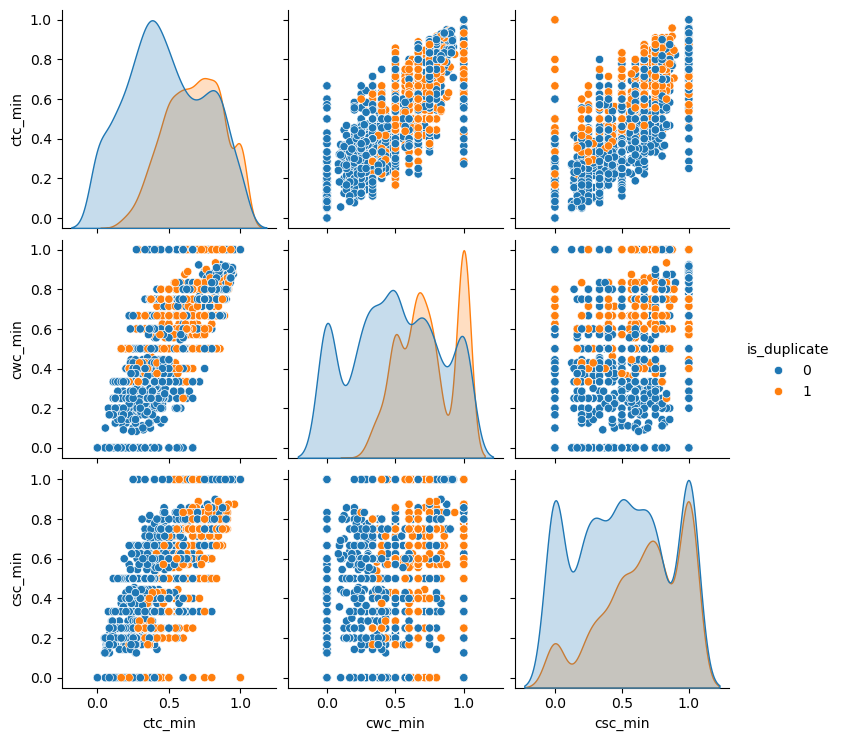

In [158]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')